<a href="https://colab.research.google.com/github/HalyaIss/Python-Projects/blob/main/global_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal is data cleaning and analysis, aimed at uncovering valuable insights into the company's operations.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Python
# import CSV file
countries = pd.read_csv("countries.csv")
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python


In [ ]:
products["id"] = products["id"].astype("object")

In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"], format="%m/%d/%Y")
events["Ship Date"] = pd.to_datetime(events["Ship Date"], format="%m/%d/%Y")
events["Order ID"] = events["Order ID"].astype("object")
events["Product ID"] = events["Product ID"].astype("object")

In [ ]:
countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
events.describe()

,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
count,1330,1330,1328.000000,1330.000000,1330.000000
mean,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,4952.201807,264.893541,187.246812
min,2010-01-01 00:00:00,2010-01-10 00:00:00,2.000000,9.330000,6.920000
25%,2011-12-16 06:00:00,2012-01-03 00:00:00,2356.750000,81.730000,35.840000
50%,2013-10-17 00:00:00,2013-11-09 00:00:00,4962.000000,154.060000,97.440000
75%,2015-08-28 18:00:00,2015-10-03 18:00:00,7459.500000,437.200000,263.330000
max,2017-07-23 00:00:00,2017-08-31 00:00:00,9999.000000,668.270000,524.960000
std,NaN,NaN,2905.198996,217.323460,176.158873


In [ ]:
products.describe()

,id,item_type
count,12,12
unique,12,12
top,2103,Cereal
freq,1,1


In [ ]:
# Checking for the presence of missing values (Countries Table).
print(countries.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
# Checking for the fraction of missing values (Countries Table).
print(countries.isna().sum() / countries.shape[0])

name          0.000000
alpha-2       0.004016
alpha-3       0.000000
region        0.004016
sub-region    0.004016
dtype: float64


In [ ]:
# Filling in the empty cells, as deleting the country would affect the subsequent join with the Events table.
countries_cl = countries[["name", "alpha-2", "alpha-3", "region", "sub-region"]].fillna("unknown")

In [ ]:
print(countries_cl.isna().sum())

name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
# Checking duplicates (Countries Table).
print(countries_cl.duplicated().sum())


0


In [ ]:
# Checking for the presence of missing values (Events Table).
print(events.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Checking for the fraction of missing values (Events Table).
print(events.isna().sum() / events.shape[0])

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.061654
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.001504
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Filling in the missing cells, since their share is more than 0.04% (Events Table).
events_cl = events[["Order ID",	"Order Date",	"Ship Date",	"Order Priority",	"Country Code",	"Product ID",	"Sales Channel",	"Units Sold",	"Unit Price",	"Unit Cost"]].fillna("unknown")

<ipython-input-87-77adee0b8c18>:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
print(events_cl.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


In [ ]:
# Checking duplicates (Events Table).
print(events_cl.duplicated().sum())

0


In [ ]:
# Editing column names.
events_cl.columns = events_cl.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Editing column names.
countries_cl.columns = countries_cl.columns.str.replace('-', '_')

In [ ]:
# Checking duplicates (Products Table).
print(products.duplicated().sum())

0


In [ ]:
# Checking for the presence of missing values (Products Table).
print(products.isna().sum())

id           0
item_type    0
dtype: int64


In [ ]:
countries_cl = countries_cl.rename(columns={"alpha_3": "country_code"})

In [ ]:
# Joining tables Countries, Events
combined_data = pd.merge(events_cl, countries_cl, on="country_code", how="inner")
combined_data.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,alpha_2,region,sub_region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,Europe,Eastern Europe


In [ ]:
# Data type conversion
combined_data["product_id"] = combined_data["product_id"].astype(str)
products["id"] = products["id"].astype(str)

In [ ]:
# Joining the Products table
final_merge = pd.merge(
    combined_data,
    products,
    left_on="product_id",
    right_on="id",
    how="inner")
final_merge.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,name,alpha_2,region,sub_region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,2103,Cereal
2,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,2455,Clothes
3,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,1270,Beverages
4,103450715,2015-03-15,2015-04-18,H,SVK,8681,Online,2220.0,651.21,524.96,Slovakia,SK,Europe,Eastern Europe,8681,Office Supplies


In [ ]:
# Data type conversion
final_merge["units_sold"] = pd.to_numeric(final_merge["units_sold"], errors="coerce")

In [ ]:
# Removing extra columns
final_merge.drop(["order_priority", "country_code", "alpha_2", "sub_region", "id"], axis=1, inplace=True)

In [ ]:
final_merge = final_merge.rename(columns={"name": "country"})

In [ ]:
# Checking for empty cells
print(final_merge.isna().sum())

order_id         0
order_date       0
ship_date        0
product_id       0
sales_channel    0
units_sold       2
unit_price       0
unit_cost        0
country          0
region           0
item_type        0
dtype: int64


In [ ]:
# Deleting empty cells
df = final_merge.dropna()

In [ ]:
# Adding new columns
df.loc[:, "revenue"] = df["units_sold"] * df["unit_price"]
df.loc[:, "cost"] = df["units_sold"] * df["unit_cost"]
df.loc[:, "profit"] = df["revenue"] - df["cost"]

In [ ]:
# Calculation of key indicators
total_units_sold = df["units_sold"].sum()
print(f"Загальна кількість замовлень: {total_units_sold}")
total_revenue = df["revenue"].sum()
print(f"Загальний дохід: {total_revenue}")
total_cost = df["cost"].sum()
print(f"Загальні витрати: {total_cost}")
total_profit = df["profit"].sum()
print(f"Загальний прибуток: {total_profit}")
count_of_country = df["country"].nunique()
print(f"Кількість охоплених країн: {count_of_country}")

Загальна кількість замовлень: 6171671.0
Загальний дохід: 1598983761.26
Загальні витрати: 1125274726.1999998
Загальний прибуток: 473709035.06
Кількість охоплених країн: 45


In [ ]:
# Grouping sales by item type
grouped_by_item_type = df.groupby("item_type")[["units_sold", "revenue", "cost", "profit"]].sum().sort_values(by="units_sold", ascending=False)
print(grouped_by_item_type)

                 units_sold       revenue          cost       profit
item_type                                                           
Office Supplies    581481.0  3.786662e+08  3.052543e+08  73411976.25
Clothes            579313.0  6.330732e+07  2.076258e+07  42544746.72
Beverages          577991.0  2.742567e+07  1.837433e+07   9051339.06
Vegetables         532510.0  8.203849e+07  4.842113e+07  33617356.30
Fruits             531135.0  4.955490e+06  3.675454e+06   1280035.35
Personal Care      530360.0  4.334632e+07  3.005550e+07  13290821.60
Baby Food          524265.0  1.338344e+08  8.357833e+07  50256042.90
Cosmetics          506188.0  2.213054e+08  1.332945e+08  88010907.56
Meat               477233.0  2.013398e+08  1.740421e+08  27297727.60
Cereal             460266.0  9.467672e+07  5.390175e+07  40774964.94
Snacks             453621.0  6.921349e+07  4.420083e+07  25012661.94
Household          417308.0  2.788744e+08  2.097140e+08  69160454.84


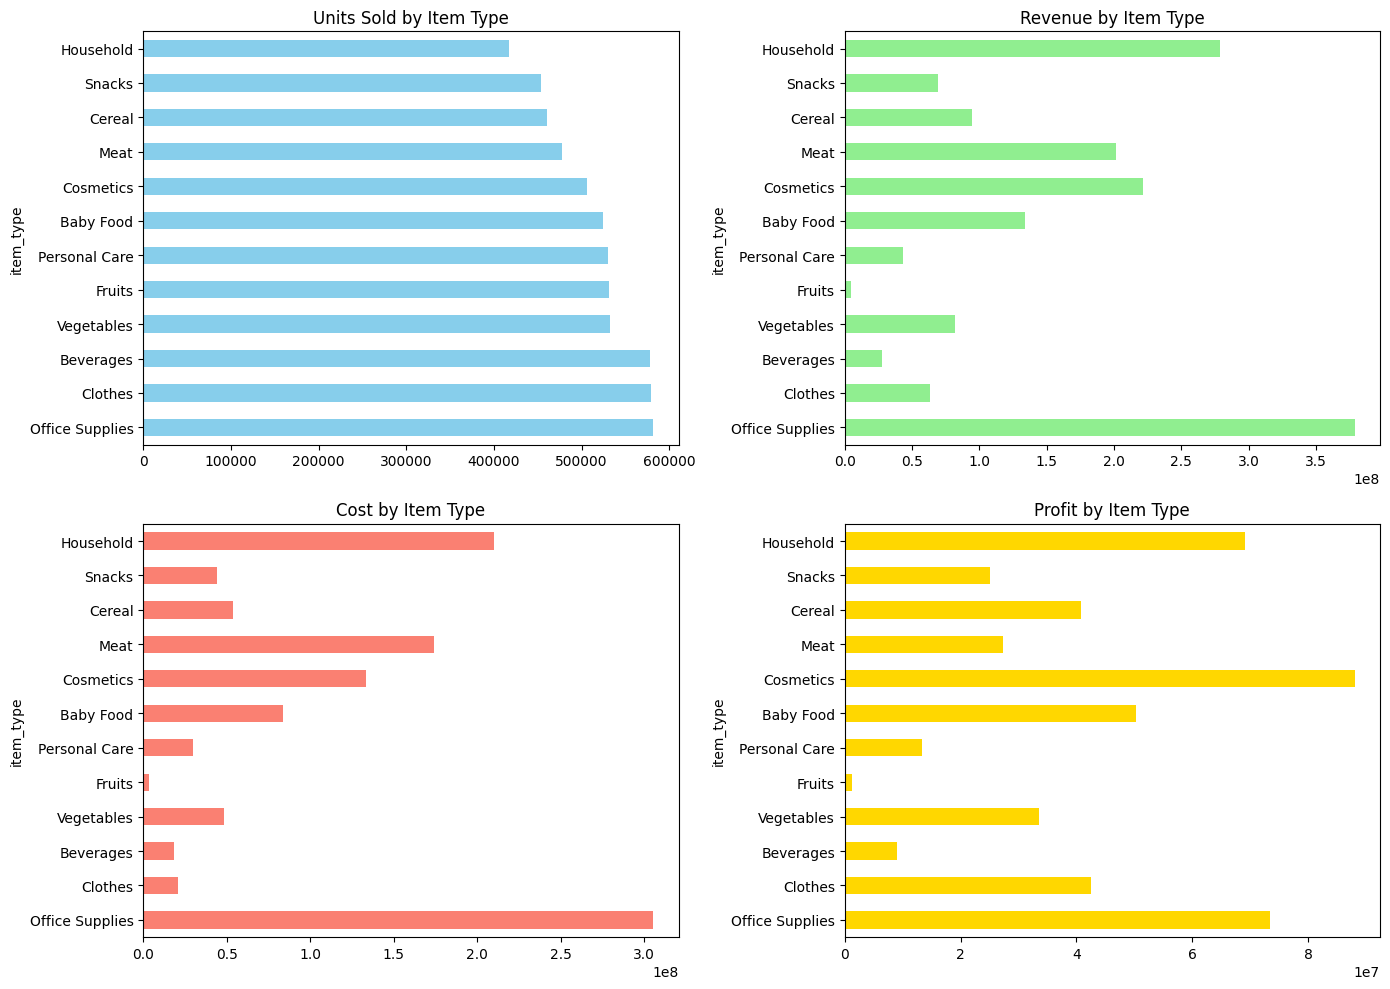

In [ ]:
# Visualization of grouped data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
grouped_by_item_type["units_sold"].plot(kind="barh", ax=axes[0, 0], title="Units Sold by Item Type", color="skyblue")
grouped_by_item_type["revenue"].plot(kind="barh", ax=axes[0, 1], title="Revenue by Item Type", color="lightgreen")
grouped_by_item_type["cost"].plot(kind="barh", ax=axes[1, 0], title="Cost by Item Type", color="salmon")
grouped_by_item_type["profit"].plot(kind="barh", ax=axes[1, 1], title="Profit by Item Type", color="gold")


plt.tight_layout()
plt.show()

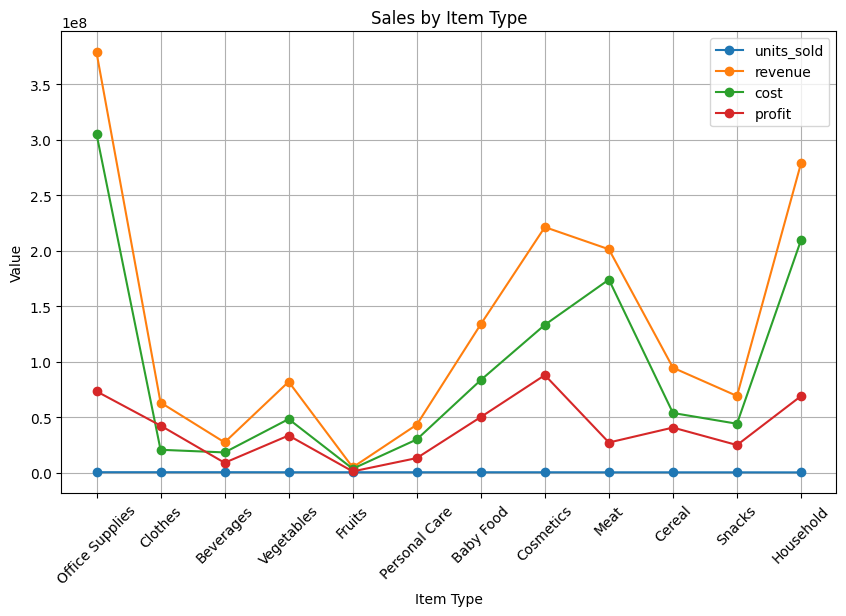

In [ ]:
plt.figure(figsize=(10, 6))
for metric in grouped_by_item_type.columns:
    plt.plot(grouped_by_item_type.index, grouped_by_item_type[metric], marker="o", label=metric)

plt.xlabel("Item Type")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.title("Sales by Item Type")
plt.legend()
plt.grid(True)
plt.show()

The highest revenue comes from the Clothes and Household categories, with peak revenue values significantly exceeding those of other categories.

The largest number of units sold is observed in the Clothes category, which shows a considerably higher figure compared to other products.

The highest profit is also generated by the Clothes and Household categories, correlating with their high revenue. Notably, profit from Clothes shows a significant peak.

The Vegetables and Meat categories have relatively high costs, resulting in lower profits despite a certain level of revenue.

The Beverages, Fruits, Personal Care, Baby Food, Cosmetics, Cereal, and Snacks categories demonstrate moderate sales levels across all indicators.

The Office Supplies category shows low performance across all metrics.

In [ ]:
grouped_by_region = df.groupby("region")[["units_sold", "revenue", "cost", "profit"]].sum().sort_values(by="units_sold", ascending=False)
print(grouped_by_region)

        units_sold       revenue          cost        profit
region                                                      
Europe   5761244.0  1.505653e+09  1.057096e+09  4.485568e+08
Asia      410427.0  9.333089e+07  6.817863e+07  2.515225e+07


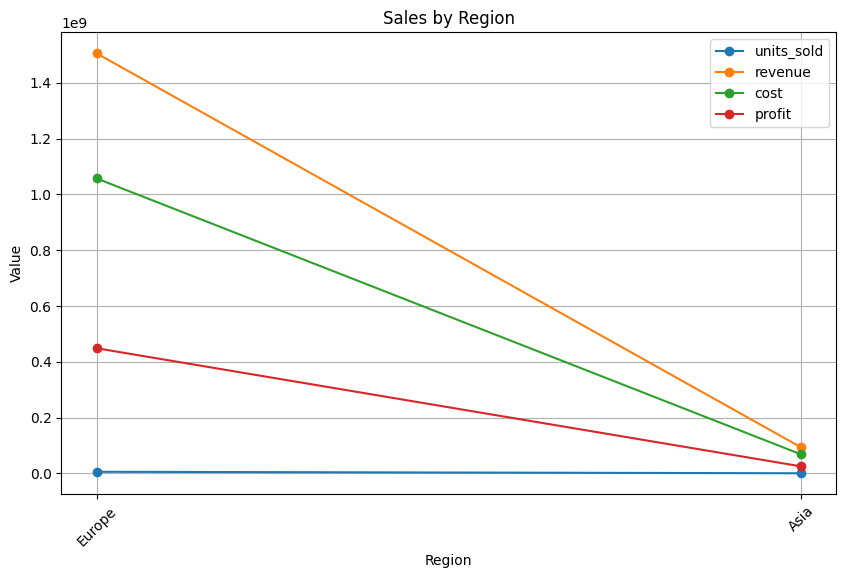

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
for metric in grouped_by_region.columns:
    plt.plot(grouped_by_region.index, grouped_by_region[metric], marker="o", label=metric)

plt.xlabel("Region")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.title("Sales by Region")
plt.legend()
plt.grid(True)
plt.show()

Europe is a more profitable market, although the sales volume in units is lower. This may indicate higher pricing strategies or the sale of higher-margin products in Europe.
Asia, on the other hand, is characterized by a higher sales volume but lower profit per unit.

In [ ]:
grouped_by_country = df.groupby("country")[["units_sold", "revenue", "cost", "profit"]].sum().sort_values(by="units_sold", ascending=False)
print(grouped_by_country)

                        units_sold      revenue         cost       profit
country                                                                  
Macedonia                 203078.0  49222085.25  35537985.30  13684099.95
San Marino                192228.0  47883708.48  34090715.67  13792992.81
Andorra                   185686.0  47756693.17  32346656.54  15410036.63
Greece                    176859.0  38699541.70  26375091.57  12324450.13
Malta                     173641.0  47145320.81  32535192.93  14610127.88
Serbia                    170369.0  42193537.74  30340023.36  11853514.38
Romania                   166882.0  34286150.85  23492602.16  10793548.69
Russia                    165954.0  46051659.81  32783977.17  13267682.64
Ukraine                   164577.0  53252317.54  38447391.80  14804925.74
Cyprus                    158743.0  33008851.50  22976630.94  10032220.56
Italy                     156781.0  35878352.12  24964430.15  10913921.97
Slovenia                  156479.0  38

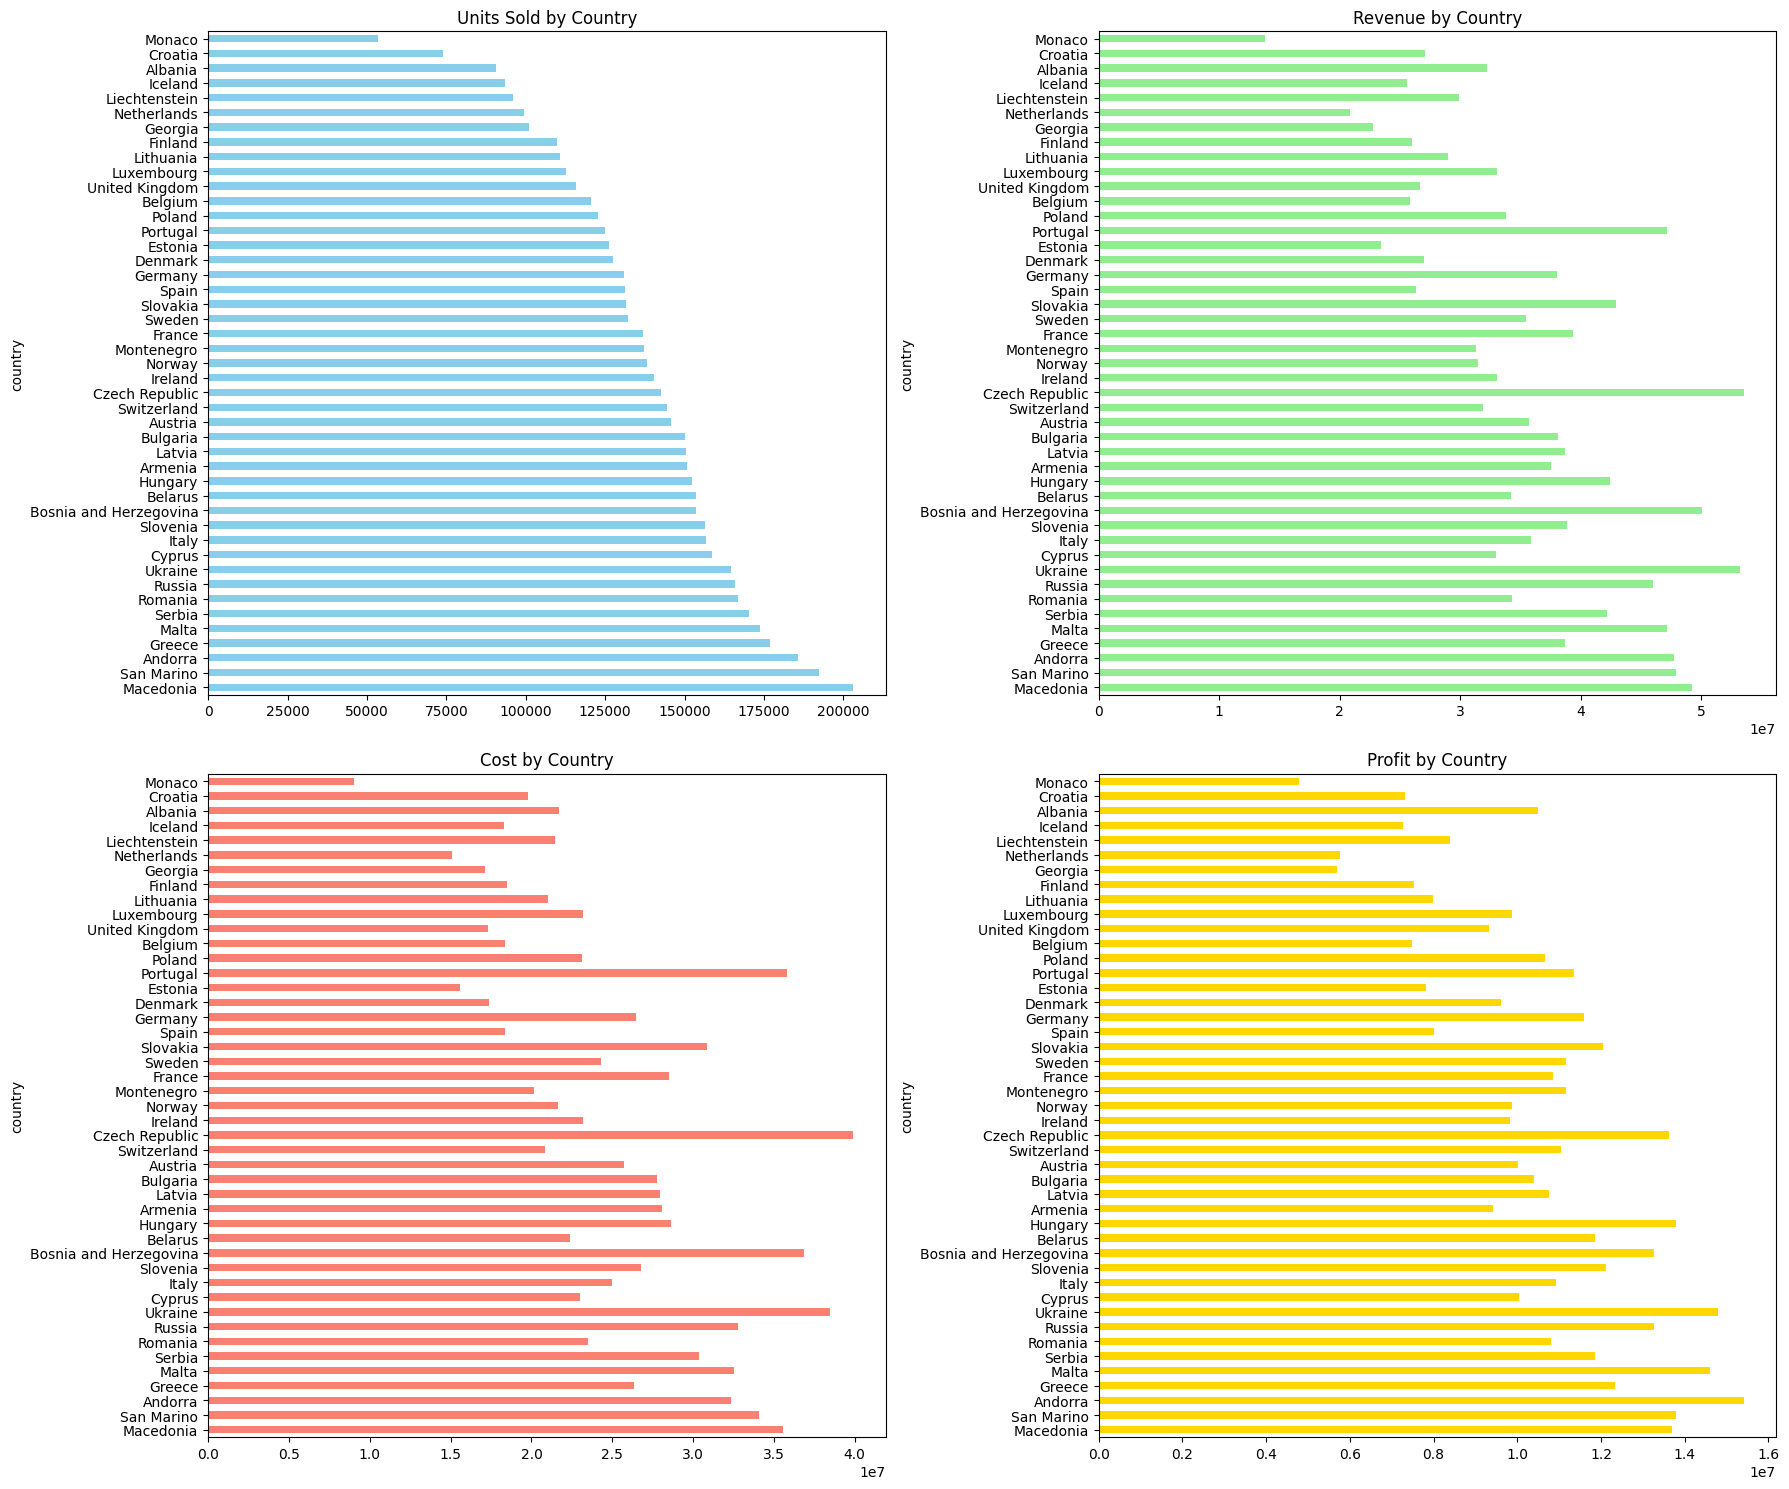

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
grouped_by_country["units_sold"].plot(kind="barh", ax=axes[0, 0], title="Units Sold by Country", color="skyblue")
grouped_by_country["revenue"].plot(kind="barh", ax=axes[0, 1], title="Revenue by Country", color="lightgreen")
grouped_by_country["cost"].plot(kind="barh", ax=axes[1, 0], title="Cost by Country", color="salmon")
grouped_by_country["profit"].plot(kind="barh", ax=axes[1, 1], title="Profit by Country", color="gold")

plt.tight_layout()
plt.show()

In [ ]:
df.loc[:, "sales_channel"] = df["sales_channel"].str.capitalize()

In [ ]:
grouped_by_channel = df.groupby("sales_channel")[["units_sold", "revenue", "cost", "profit"]].sum().sort_values(by="units_sold", ascending=False)
print(grouped_by_channel)

               units_sold       revenue          cost        profit
sales_channel                                                      
Offline         3113412.0  8.100305e+08  5.715191e+08  2.385113e+08
Online          3058259.0  7.889533e+08  5.537556e+08  2.351977e+08


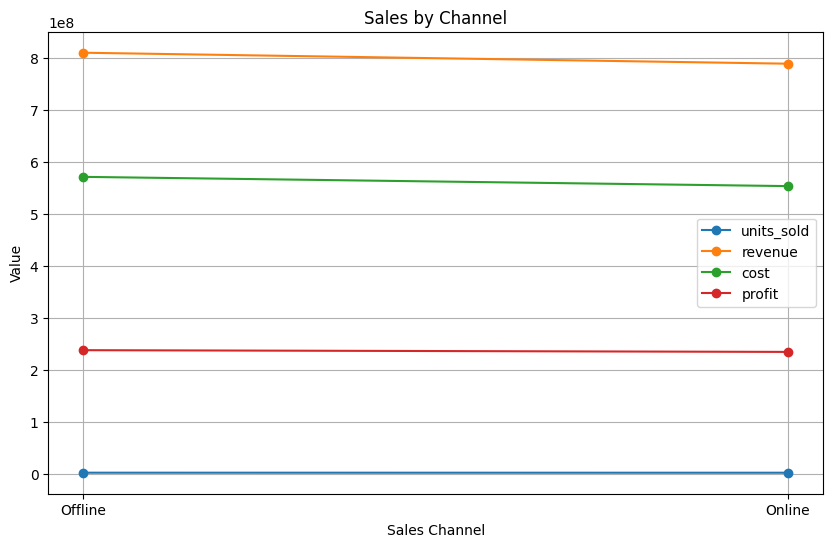

In [ ]:
plt.figure(figsize=(10, 6))
for metric in grouped_by_channel.columns:
    plt.plot(grouped_by_channel.index, grouped_by_channel[metric], marker="o", label=metric)

plt.xlabel("Sales Channel")
plt.ylabel("Value")
plt.title("Sales by Channel")
plt.legend()
plt.grid(True)
plt.show()

Both sales channels show similar volumes of units sold. However, the online channel is more profitable.

In [ ]:
df.loc[:, "delivery_time"] = (df["ship_date"] - df["order_date"]).dt.days

In [ ]:
grouped_by_delivery_time_item = df.groupby("item_type")[["delivery_time", "profit"]].median().sort_values(by="delivery_time")
print(grouped_by_delivery_time_item)

                 delivery_time     profit
item_type                                
Personal Care             20.0  117644.17
Clothes                   21.0  444201.84
Fruits                    23.0   13067.02
Beverages                 23.0   80461.08
Vegetables                23.0  335220.30
Household                 24.0  786223.12
Meat                      24.5  269469.20
Snacks                    25.0  264065.46
Cosmetics                 28.0  722951.46
Office Supplies           28.0  674427.50
Baby Food                 29.0  490611.48
Cereal                    29.0  395377.17


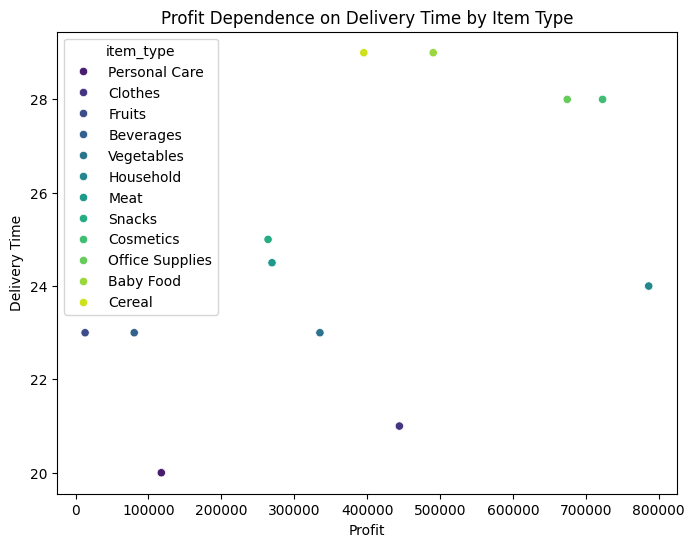

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_by_delivery_time_item, x="profit", y="delivery_time", hue="item_type", palette="viridis")
plt.title("Profit Dependence on Delivery Time by Item Type")
plt.xlabel("Profit")
plt.ylabel("Delivery Time")
plt.show()


In [ ]:
grouped_by_delivery_time_region = df.groupby("region")[["delivery_time", "profit"]].median().sort_values(by="delivery_time")
print(grouped_by_delivery_time_region)

        delivery_time      profit
region                           
Europe           25.0  274868.020
Asia             25.5  258344.745


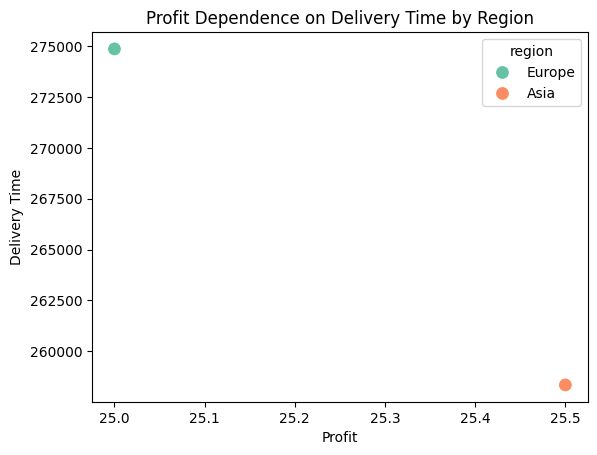

In [ ]:
sns.scatterplot(
    data=grouped_by_delivery_time_region,
    x="delivery_time",
    y="profit",
    hue=grouped_by_delivery_time_region.index,
    s=100,
    palette="Set2"
)
plt.title("Profit Dependence on Delivery Time by Region")
plt.xlabel("Profit")
plt.ylabel("Delivery Time")
plt.show()

In [ ]:
grouped_by_delivery_time_country = df.groupby("country")[["delivery_time", "profit"]].median().sort_values(by="delivery_time")

<ipython-input-122-2bbbf03b227f>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



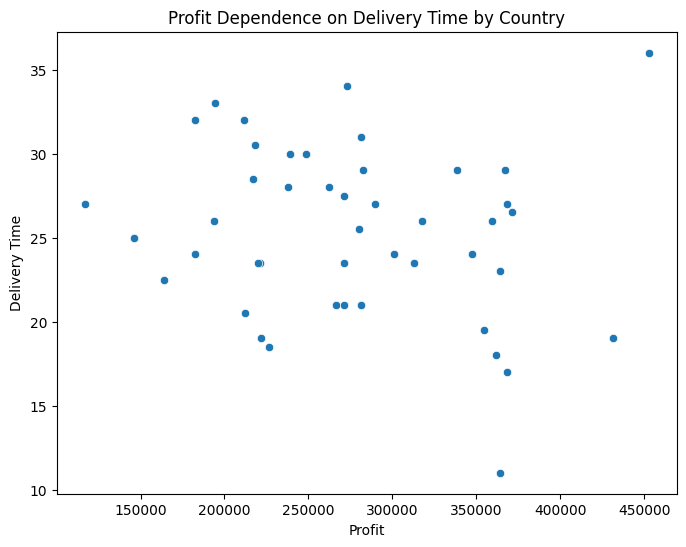

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_by_delivery_time_country, x="profit", y="delivery_time", palette="viridis")
plt.title("Profit Dependence on Delivery Time by Country")
plt.xlabel("Profit")
plt.ylabel("Delivery Time")
plt.show()

Based on the analysis of the time interval between order and shipment across product categories, countries, and regions, there appears to be little to no direct relationship between the interval and profit. No strong correlation is observed between delivery time and profitability.


In [ ]:
df.loc[:,"year"] = df["order_date"].dt.strftime("%Y")

In [ ]:
pivot_table_sales_by_item = pd.pivot_table(df, values="revenue", index="item_type", columns="year", aggfunc="mean")
print(pivot_table_sales_by_item)

year                     2010          2011          2012          2013  \
item_type                                                                 
Baby Food        1.223421e+06  1.452109e+06  1.510205e+06  1.311063e+06   
Beverages        2.395073e+05  2.764006e+05  2.514850e+05  2.407444e+05   
Cereal           1.035252e+06  9.129087e+05  9.323748e+05  9.587806e+05   
Clothes          6.433587e+05  6.725191e+05  6.137913e+05  4.628227e+05   
Cosmetics        2.267240e+06  2.202586e+06  2.464318e+06  1.742554e+06   
Fruits           5.319189e+04  4.688118e+04  3.731813e+04  6.363399e+04   
Household        2.580910e+06  3.704316e+06  3.120582e+06  3.326054e+06   
Meat             2.258558e+06  2.271948e+06  2.306864e+06  1.755095e+06   
Office Supplies  3.136678e+06  3.882374e+06  3.160037e+06  2.553883e+06   
Personal Care    4.173038e+05  4.181409e+05  3.911271e+05  3.911734e+05   
Snacks           7.756622e+05  5.390929e+05  7.959240e+05  8.439098e+05   
Vegetables       8.215139

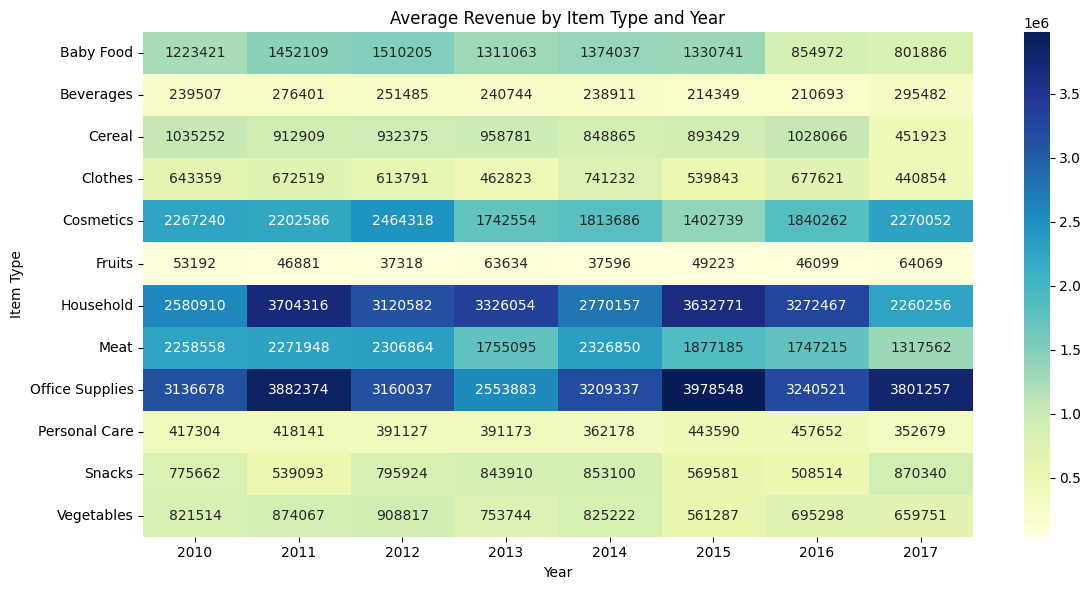

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_sales_by_item, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Revenue by Item Type and Year")
plt.xlabel("Year")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()

Top revenue-generating categories — Office Supplies, Household, and Meat — show consistently high income over the years.
Cosmetics displays gradual growth, increasing from approximately 2.2 million in 2010 to over 2.2 million in 2017.

Baby Food also shows growth until 2014, followed by a decline in revenue.

Low performers — Fruits, Beverages, and Personal Care — have the lowest average revenue.

During 2014–2015, revenue growth is observed across many categories (e.g., Office Supplies, Household). After 2015, some categories show a decline (Meat, Baby Food, Cereal).

In [ ]:
pivot_table_sales_by_region = pd.pivot_table(df, values="revenue", index="region", columns="year", aggfunc="mean")
print(pivot_table_sales_by_region)

year            2010          2011          2012          2013          2014  \
region                                                                         
Asia    1.276397e+06  4.830489e+05  1.452728e+06  1.370165e+06  1.023047e+06   
Europe  1.271717e+06  1.362759e+06  1.428892e+06  1.156203e+06  1.279363e+06   

year            2015          2016          2017  
region                                            
Asia    1.342447e+06  7.804775e+05  1.076196e+06  
Europe  1.433238e+06  1.114868e+06  1.288467e+06  


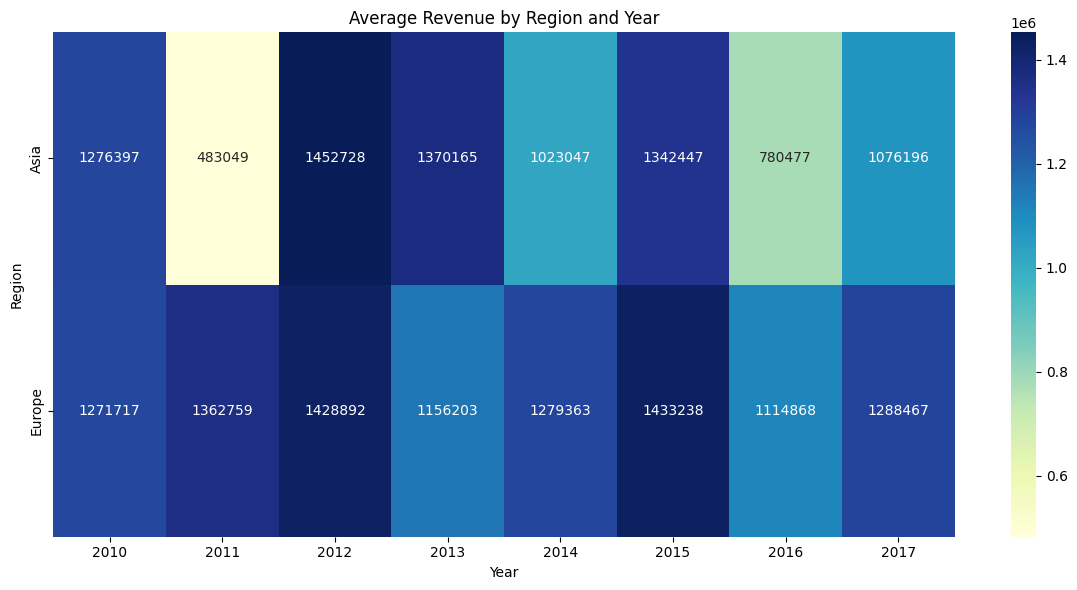

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_sales_by_region, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Revenue by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [ ]:
df_line = pivot_table_sales_by_region.reset_index().melt(
    id_vars="region", var_name="year", value_name="avg_revenue"
)

fig = px.line(
    df_line,
    x="year",
    y="avg_revenue",
    color="region",
    markers=True,
    title="Average Profit by Region",
    labels={"year": "Year", "avg_revenue": "Average Revenue", "region": "Region"}
)
fig.update_layout(xaxis_type='category')
fig.show()


Asia: The average revenue in Asia experienced significant fluctuations over the period.

Europe: The average revenue in Europe also fluctuated, but less noticeably than in Asia. It peaked slightly in 2012 and then showed a downward trend with minor upticks.

In [ ]:
df.loc[:,"month"] = df["order_date"].dt.month

In [ ]:
pivot_table_sales_by_region_month = pd.pivot_table(df, values="revenue", index="region", columns="month", aggfunc="mean")
print(pivot_table_sales_by_region_month)

month             1             2             3             4             5   \
region                                                                         
Asia    5.014418e+05  1.264161e+06  1.153468e+06  9.127121e+05  1.227986e+06   
Europe  1.327089e+06  1.282977e+06  1.257106e+06  1.132896e+06  1.271663e+06   

month             6             7             8             9             10  \
region                                                                         
Asia    1.721849e+06  6.063104e+05  3.277101e+06  1.921539e+06  1.196483e+06   
Europe  1.333337e+06  1.380856e+06  1.181021e+06  1.307094e+06  1.109983e+06   

month             11            12  
region                              
Asia    1.112061e+06  5.481869e+05  
Europe  1.409276e+06  1.543317e+06  


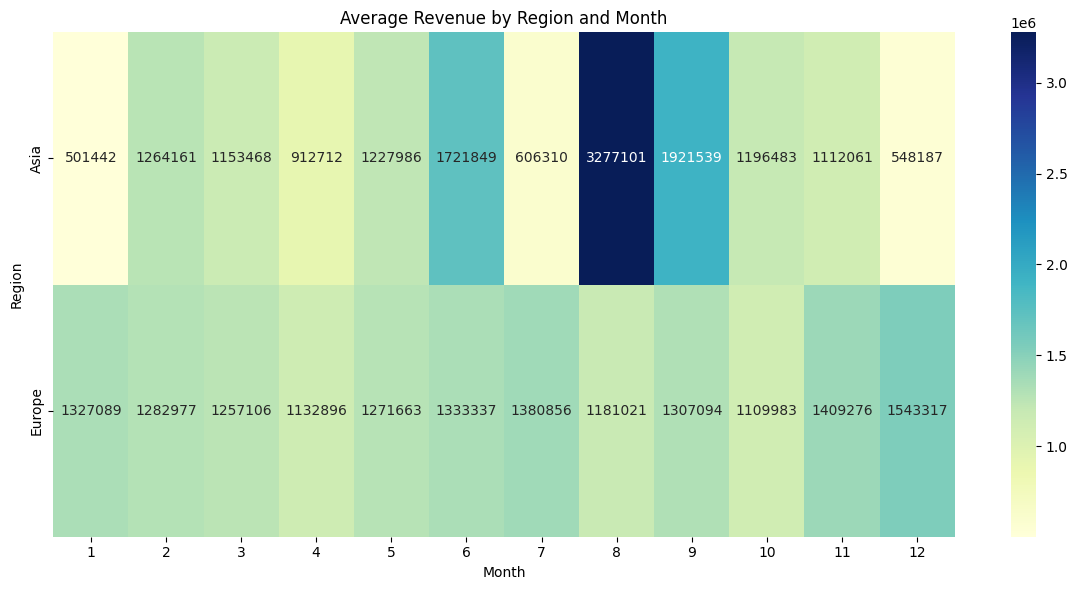

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_sales_by_region_month, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Revenue by Region and Month")
plt.xlabel("Month")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Asia: The highest average revenue in Asia occurs in the 8th and 9th months (August and September). The lowest revenue is observed in the 1st and 12th months (January and December). Overall, revenue in Asia shows significant fluctuations throughout the year.

Europe: The average revenue in Europe is relatively stable throughout the year, without the sharp peaks or drops seen in Asia.

Overall, the average revenue in Asia demonstrates greater seasonality, with a pronounced peak at the end of summer and beginning of autumn. In contrast, Europe’s average revenue is more evenly distributed throughout the year.

In [ ]:
pivot_table_sales_by_country_month = pd.pivot_table(df, values="revenue", index="country", columns="month", aggfunc="mean")

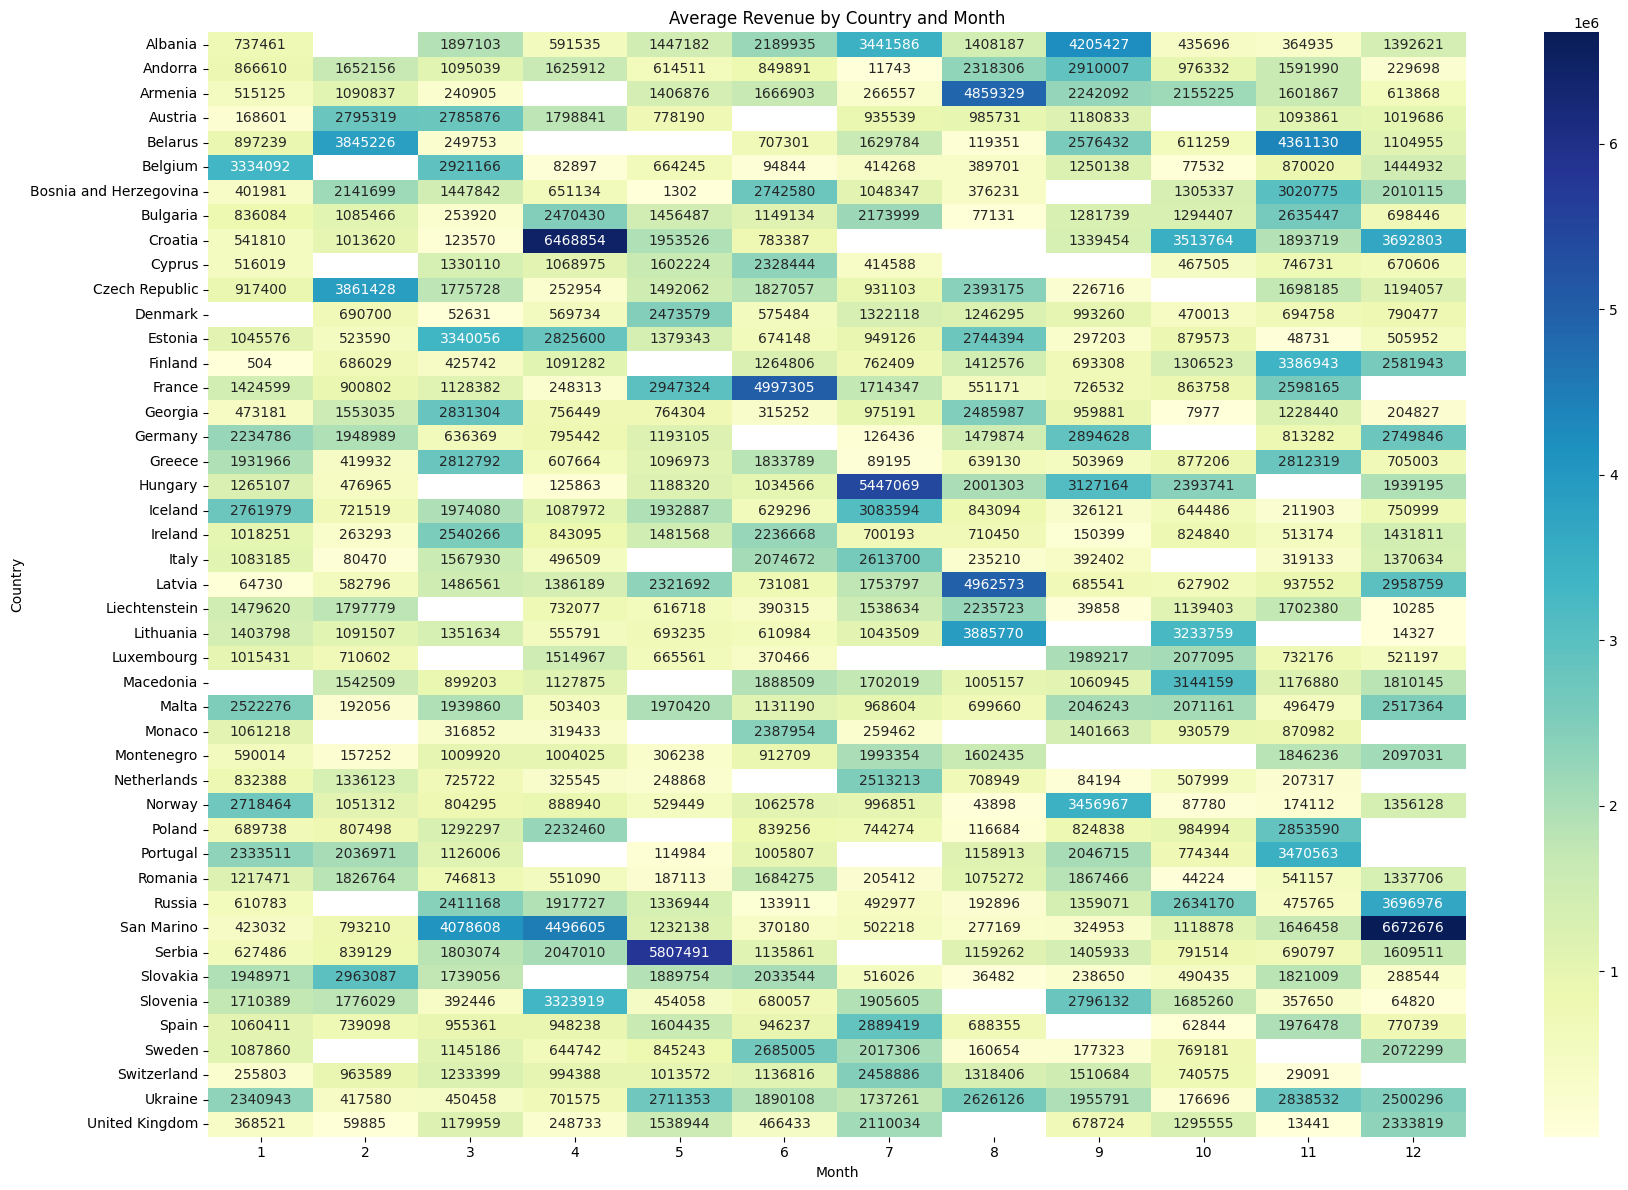

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table_sales_by_country_month, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Revenue by Country and Month")
plt.xlabel("Month")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [ ]:
df.loc[:,"day_name"] = df["order_date"].dt.day_name()

In [ ]:
pt_sales_metrics_by_dayname = pd.pivot_table(df, values=["units_sold", "revenue", "cost", "profit"], index="day_name", aggfunc="mean")
print(pt_sales_metrics_by_dayname)

                   cost         profit       revenue   units_sold
day_name                                                         
Friday     1.044769e+06  449836.976564  1.494606e+06  4833.141104
Monday     1.016294e+06  392157.583152  1.408452e+06  5074.331522
Saturday   7.962250e+05  359911.964817  1.156137e+06  5081.408377
Sunday     7.953979e+05  351010.734845  1.146409e+06  5091.628866
Thursday   9.059426e+05  380432.628608  1.286375e+06  5177.354430
Tuesday    8.123828e+05  365016.476954  1.177399e+06  4792.959770
Wednesday  9.730742e+05  372352.321044  1.345427e+06  4614.670330


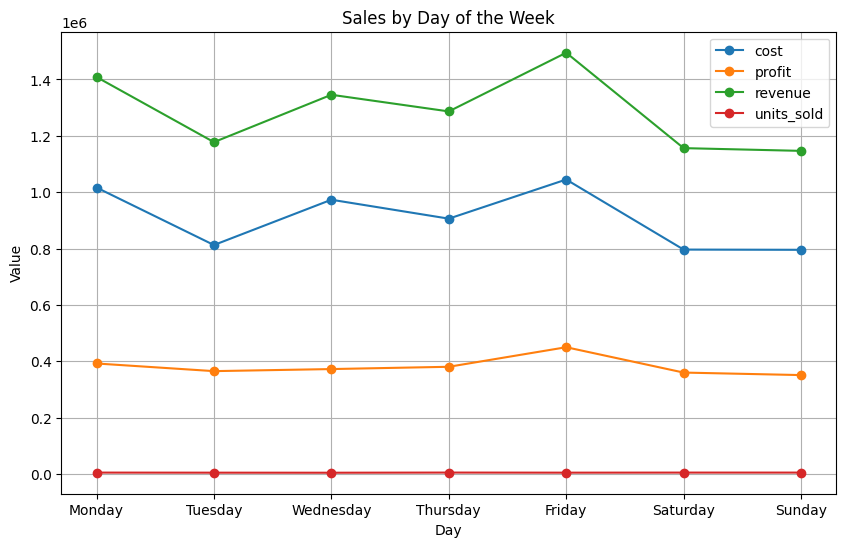

In [ ]:
# Ordering the days of the week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pt_sales_metrics_by_dayname = pt_sales_metrics_by_dayname.reindex(ordered_days)

plt.figure(figsize=(10, 6))
for metric in pt_sales_metrics_by_dayname.columns:
    plt.plot(pt_sales_metrics_by_dayname.index, pt_sales_metrics_by_dayname[metric], marker="o", label=metric)

plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Sales by Day of the Week")
plt.legend()
plt.grid(True)
plt.show()

The highest revenue and cost occur on Friday, indicating peak customer activity on that day.

Profit is also highest on Friday, making it the most effective sales day.

The lowest figures are seen on Saturday and Sunday, especially for revenue and cost, reflecting a decline in trading activity over the weekend.

Units sold remain fairly stable throughout the week but show a slight decrease on weekends.

Recommendation: Focus marketing campaigns toward the end of the workweek (Thursday–Friday), when customer activity is at its highest.
